Based on PES team survey results collected during the Current State Top Down Assessment Workshop and Bottom Up assessment and analysis, we have assessed the following capabilities for this team:

**Culture: 3.75**
- meets all items up to and including Intermediate: 3.5
- meets one Advanced item (asset lifecycle): .25

**Automation: 3.25**
- meets 2 out of 3 items (- automated env provisioning): 3.25

**Architecture: 3.0**
- meets all of minimum requirements: 2.5
- meets one intermediate requirement (modular design): .25
- partially meets one or more advanced requirements: .25

**LEAN: 2.75**
- meets all requirements up to minimum: 2.5
- meets some of the Intermediate requirements: .25

**Measures: 4.25**
- meets all requirements up and including intermediate: 3.5
- advanced: instrumentation (always) and dashboards (usually): .5
- breakaway: proactively improves methods/performance: .25

**Sharing: 3.5**
- meets most of the requirements including intermediate: 3
- meets some aspects of advanced and breakaway: .5

Based on CDS-A team survey results collected during the Current State Top Down Assessment Workshop and Bottom Up assessment and analysis, we have assessed the following capabilities for this team:

**Culture: 3.25**
- meets most of the minimum requirements: 2.5
- meets most of the intermediate requirements: + .75

**Automation: 2.25**
- meets about half of minimum requirements: 2.25

**Architecture: 2.25**
- sometimes meeting minimum requirements: 2
- usually architecture documented and living: .25

**LEAN: 2.25**
- sometimes or usually meeting minimum requirements 2
- meets some of the Intermediate requirements: .25

**Measures: 1.5**
- meets most of the forming requirements: 1.5

**Sharing: 1.75**
- meets some of the forming requirements: 1.5
- meets some aspects of minimum requirements: .5

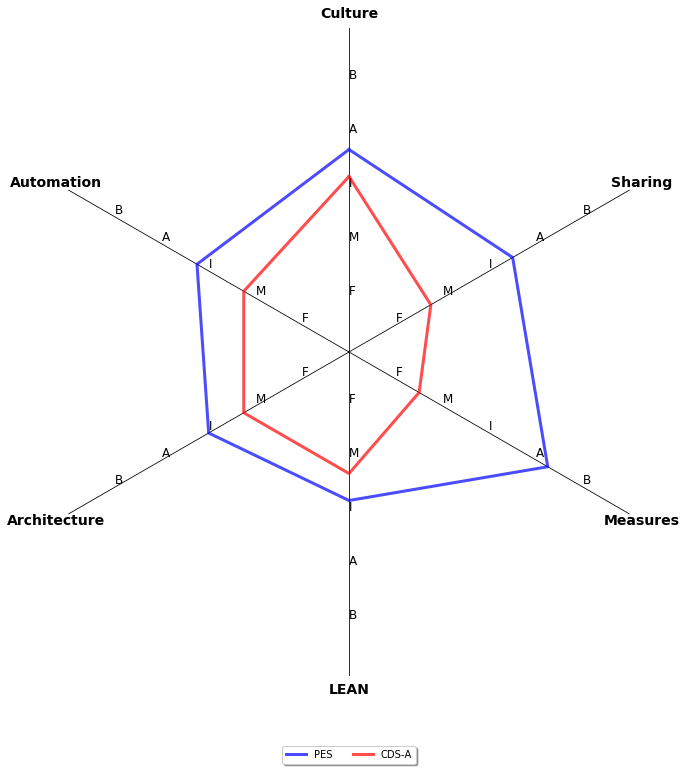

In [4]:

import numpy as np
import pylab as pl
import matplotlib.pyplot as py

class Radar(object):

    def __init__(self, fig, titles, label, rect=None):
        if rect is None:
            # layout area for polar plot - axes postioning left, bottom, width, height in fractions of figure width and height
            rect = [0.05, 0.15, 0.95, 0.75]

        self.n = len(titles)
        self.angles = [a if a <=360. else a - 360. for a in np.arange(90, 90+360, 360.0/self.n)]
        self.axes = [fig.add_axes(rect, projection="polar", label="axes%d" % i) 
                        for i in range(self.n)]

        self.ax = self.axes[0]
        # these are the endpoints for CAALMS spelled-out 
        self.ax.set_thetagrids(self.angles, labels=titles, fontsize=14, weight="bold", color="black")

        for ax in self.axes[1:]:
            ax.patch.set_visible(False)
            ax.grid(False)
            ax.xaxis.set_visible(False)
            self.ax.yaxis.grid(False)

        for ax, angle in zip(self.axes, self.angles):
            ax.set_rgrids(range(1, 6), labels=label, angle=angle, fontsize=12)
            # hide outer circle/spine
            ax.spines["polar"].set_visible(False)
            ax.set_ylim(0, 6)  
            ax.xaxis.grid(True,color='black',linestyle='-')

    def plot(self, values, *args, **kw):
        angle = np.deg2rad(np.r_[self.angles, self.angles[0]])
        values = np.r_[values, values[0]]
        self.ax.plot(angle, values, *args, **kw)

fig = pl.figure(figsize=(12,12))

titles = ['Culture', 'Automation', 'Architecture', 'LEAN', 'Measures', 'Sharing']
label = list("FMIAB")

radar = Radar(fig, titles, label)
radar.plot([3.75, 3.25, 3.0, 2.75, 4.25, 3.5], "-", lw=3, color="b", alpha=.7, label="PES")
radar.plot([3.25, 2.25, 2.25, 2.25, 1.5, 1.75],"-", lw=3, color="r", alpha=.7, label="CDS-A")

radar.ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10),
      fancybox=True, shadow=True, ncol=4)

pl.show()

# for saving to file (convenience for inserting into pptx)
# fig = py.gcf()
# fig.set_size_inches(6, 10, forward=True)
# fig.savefig('CAALMS.png', dpi=100, bbox_inches="tight", pad_inches=1)

**PES CAALMS** level of practice. This is simply a measure of where things are now. No team should take this assessment as anything more than an understanding of the challenges they might be facing. In many cases, this has nothing to do with internal team performance.

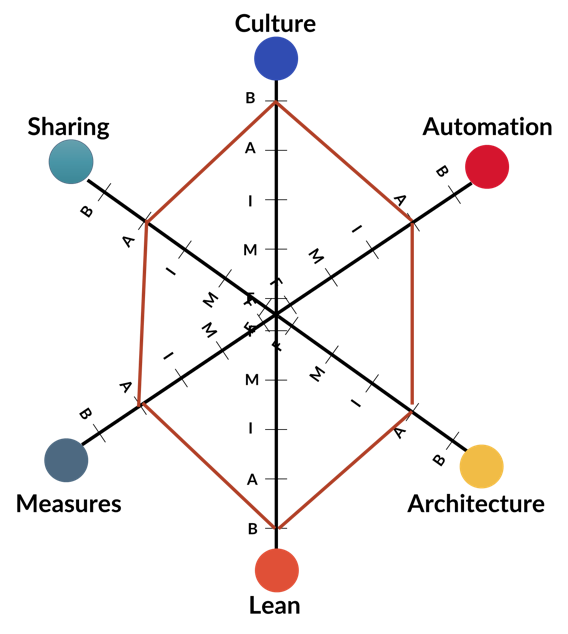